# Hybrid tempogram
The hybrid tempogram combines the Fourier-based and autocorrelation-based tempograms into one. It is the element-wise product of both tempograms.

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import librosa.display
from RhythmRecognition.constants import *
import matplotlib as mpl
from RhythmRecognition.onset import spectral
from RhythmRecognition.tempo import hybrid

mpl.rcParams.update({'font.size': 16})

audiofile = "../audio_files/spark.wav"


## Compute novelty function
Before computing the tempogram, we need to compute a novelty function of the audio signal. We will use the spectral-based novelty function.

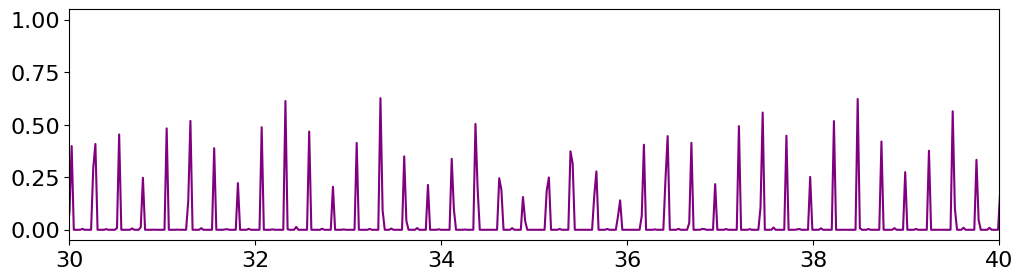

In [13]:
novelty_function = spectral.SpectralNovelty(audiofile)
novelty_function = novelty_function.get()

frames = np.arange(len(novelty_function))
t = librosa.frames_to_time(frames, sr=SAMPLING_RATE, hop_length=HOP_LENGTH)

plt.figure(figsize=(12, 3))
plt.plot(t, novelty_function, 'purple')
plt.xlim(30, 40)
plt.show()

## Compute tempogram
After computing a novelty function, we can compute the hybrid tempogram.

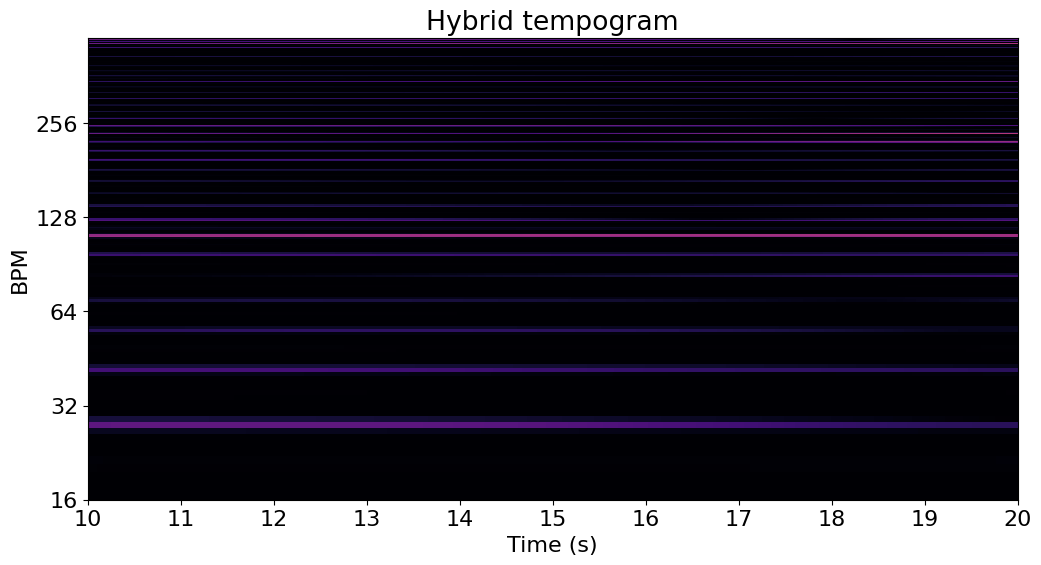

In [14]:
hybrid_tempogram = hybrid.HybridTempogram(novelty_function)
tempogram = hybrid_tempogram.get_tempogram()

plt.figure(figsize=(12, 6))
librosa.display.specshow(tempogram, x_axis='time', y_axis='fourier_tempo', sr=SAMPLING_RATE, cmap='magma')
plt.xlabel("Time (s)")
plt.xlim(10, 20)
plt.title("Hybrid tempogram")
plt.show()

Then, we can extract the most dominant tempo from the tempogram (correct value is 117 BPM).

In [15]:
tempo = hybrid_tempogram.get_tempo()
print("Tempo:", tempo, "BPM")

Tempo: 118 BPM


For better visualization of dominant tempi, we can also sum up the Fourier tempogram for each BPM value and inspect this function. A higher value indicates a more dominant tempo.

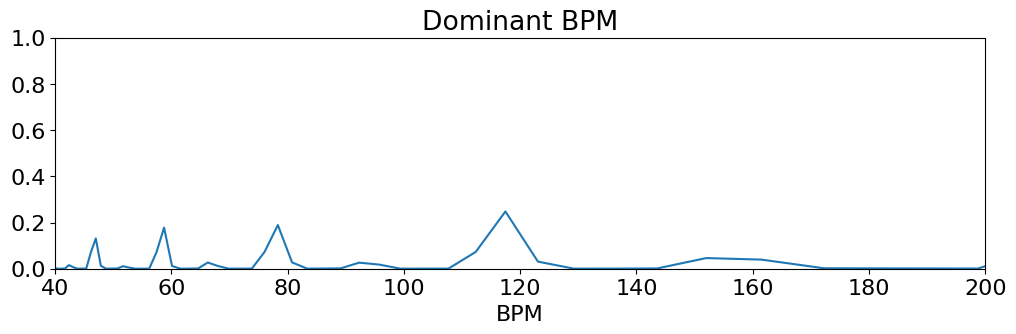

In [16]:
sum_of_tempos = np.sum(tempogram.T, axis=0)
sum_of_tempos /= max(sum_of_tempos)
bpm_values = librosa.tempo_frequencies(hop_length=HOP_LENGTH, sr=SAMPLING_RATE, n_bins=len(novelty_function))

plt.figure(figsize=(12, 3))
plt.plot(bpm_values[:len(sum_of_tempos)], sum_of_tempos)
plt.xlabel('BPM')
plt.xlim(40, 200)  # show only subset of tempi, because this is the interval where tempo is taken from
plt.ylim(0, 1)
plt.title("Dominant BPM")
plt.show()